# Learning NN with MNIST Dataset

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from random import *

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
#define out network
class Mnist(nn.Module):

    def __init__(self):
        super(Mnist, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)        
        #x = F.softmax(x)
        x = F.sigmoid(x)
        x = x.view(-1,10)
        return x
    
net = Mnist()
print(net)


Mnist(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


## Test our network with random data and get it to learn something

In [3]:
input = Variable(torch.randn(1, 1, 784))
target = Variable(torch.arange(1, 11))  

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss)
loss.backward() # calculate gradient
optimizer.step() # update weight


before optimize Variable containing:
 33.4846
[torch.FloatTensor of size 1]



In [4]:
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss) # it number is smaller than before, therefore the network is learning something


after optimize Variable containing:
 33.1180
[torch.FloatTensor of size 1]



In [5]:
#we can trace the loss.grade_fn backwards through the network.
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")


In [7]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [8]:
len(mnist.data)

70000

In [9]:
len(mnist.target)

70000

In [10]:
len(mnist.data[0])

784

(array([ 6903.,  7877.,  6990.,  7141.,  6824.,  6313.,  6876.,  7293.,
        13783.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

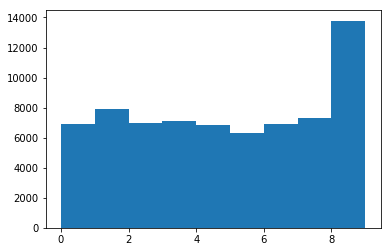

In [11]:
plt.hist(mnist.target, bins=range(10))

C:\Users\derekli\AppData\Local\conda\conda\envs\fastai\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


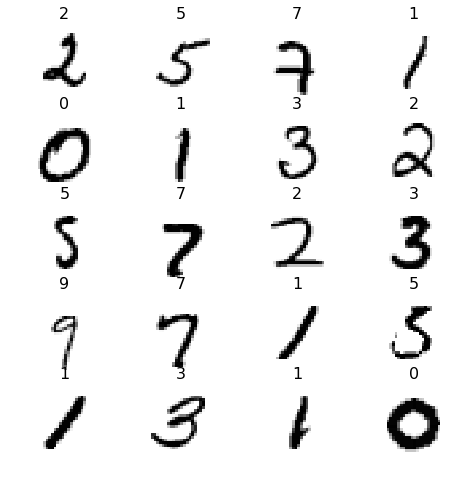

In [12]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    idx = randint(0, 70000)
    img =  mnist.data[idx].reshape((28,28))
    sp = fig.add_subplot(rows, columns , i)
    sp.axis('Off')
    sp.set_title(int(mnist.target[idx]), fontsize=16)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray_r')



In [13]:
len(mnist.data[0])

784

In [14]:
28*28

784

## Single Image Training

In [15]:
net = Mnist()
numbers = np.arange(10)

input_tensor = torch.from_numpy(np.array(mnist.data[0]).reshape(1,1,784))
target_tensor = torch.from_numpy((numbers == mnist.target[0]).astype(int).reshape(1,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.2358
[torch.FloatTensor of size 1]
 Variable containing:
 0.6125  0.5751  0.6392  0.3747  0.5050  0.5477  0.3456  0.5677  0.4078  0.4064
[torch.FloatTensor of size 1x10]

after optimize Variable containing:
 0.2236
[torch.FloatTensor of size 1]
 Variable containing:
 0.5830  0.5608  0.6180  0.3605  0.4943  0.5324  0.3349  0.5460  0.3707  0.4007
[torch.FloatTensor of size 1x10]



As you can see the loss after is smaller than before. Also for the same input the probability for 0 is higher while others (note all) going down.

In [16]:
net = Mnist()
numbers = np.arange(10)

i1, i2 = np.array(mnist.data[0]), np.array(mnist.data[50000])
t1, t2 = (numbers == mnist.target[0]).astype(int), (numbers == mnist.target[50000]).astype(int)
input_tensor  = torch.from_numpy(np.concatenate((i1, i2)).reshape(2,1,784))
target_tensor = torch.from_numpy(np.concatenate((t1, t2)).reshape(2,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.3129
[torch.FloatTensor of size 1]
 Variable containing:
 0.3448  0.6375  0.6860  0.6012  0.6259  0.5152  0.4511  0.5373  0.4431  0.5938
 0.3798  0.5633  0.5176  0.4983  0.5547  0.5551  0.4218  0.5961  0.4750  0.7005
[torch.FloatTensor of size 2x10]

after optimize Variable containing:
 0.3048
[torch.FloatTensor of size 1]
 Variable containing:
 0.3566  0.6352  0.6865  0.5906  0.6052  0.4802  0.4529  0.5603  0.4552  0.5732
 0.3944  0.5485  0.5184  0.4852  0.5293  0.5626  0.4049  0.6029  0.4814  0.6739
[torch.FloatTensor of size 2x10]



In [17]:
def get_batch(idxs, bs = 100):
    numbers = np.arange(10)
    for i in range(0, len(idxs)//bs):        
        yield [ ( j, \
                   mnist.target[j], \
                   np.array(mnist.data[j]), \
                   (numbers == mnist.target[j]).astype(int)\
                 ) for j in idxs[i*bs:(i+1)*bs] ]

C:\Users\derekli\AppData\Local\conda\conda\envs\fastai\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


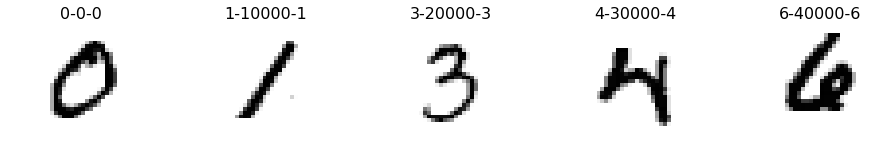

In [18]:
def show_batch(idxs, targets):
    w=10
    h=10
    columns = 5
    rows = len(idxs)//columns
    fig=plt.figure(figsize=(16, rows*2))
    for i in range(1, columns*rows +1):
        idx = idxs[i-1]
        img =  mnist.data[idx].reshape((28,28))
        sp = fig.add_subplot(rows, columns , i)
        sp.axis('Off')
        sp.set_title(str(int(mnist.target[idx]))+'-'+str(idx)+'-'+str(int(targets[i-1])), fontsize=16)
        fig.add_subplot(rows, columns, i) 
        plt.imshow(img, cmap='gray_r')
        
for b in get_batch(range(0,70000,10000), bs=5):
    idxs, targets, nn_imgs, nn_targets = list(zip(*b))
    #print('show images', zipb[2])
    show_batch(idxs, targets)
    #show_batch(range(0,70000,1000))        


In [ ]:
#net = Mnist()
bs = 50
#idxs = range(0,70000,10000)

x = np.random.permutation(60000)
training_data_index = x[:60000]
validation_data_index = x[50000:]
test_data_index = range(60000, 70000)
idxs = training_data_index

for epoch in range(300):
    
    x = np.random.permutation(60000)
    training_data_index = x[:60000]
    validation_data_index = x[50000:]
    test_data_index = range(60000, 70000)
    idxs = training_data_index
    shown = 0
    
    l = 0
    test_total = 0
    test_pred_right = 0
    
    for b in get_batch(idxs, bs):
        idxs, targets, nn_imgs, nn_targets = list(zip(*b))

        #i1, i2 = np.array(mnist.data[0]), np.array(mnist.data[50000])
        #t1, t2 = (numbers == mnist.target[0]).astype(int), (numbers == mnist.target[50000]).astype(int)

        input_tensor  = torch.from_numpy(np.concatenate(nn_imgs).reshape(bs,1,784))
        target_tensor = torch.from_numpy(np.concatenate(nn_targets).reshape(bs,1,10))

        input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
        target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

        optimizer = optim.SGD(net.parameters(), lr=0.1)
        optimizer.zero_grad()   
        output = net(input)
        criterion = nn.CrossEntropyLoss()
        t1 = target.view(-1, 10).type(torch.LongTensor)
        t2 = torch.autograd.Variable(torch.from_numpy(np.array(targets).reshape(-1))).type(torch.LongTensor)
        #print('shape:', output.size(), target.size(), t1.size(), output.data[0] , t1.data[0])        
        #print('shape:', t2.size(), t2.data[0], t2.size()[1:])        
        #print('t1', t2, output)
        #loss = criterion(output, torch.autograd.Variable(torch.from_numpy(np.array(targets).reshape(-1, 10))).type(torch.LongTensor))
        #loss = criterion(output.view(-1,10), target.view(-1,10).type(torch.LongTensor))        
        loss = criterion(output, t2)       
        l = loss
        loss.backward() # calculate gradient
        optimizer.step() # update weight
    
    for b in get_batch(test_data_index, bs):
        idxs, targets, nn_imgs, nn_targets = list(zip(*b))
        input_tensor  = torch.from_numpy(np.concatenate(nn_imgs).reshape(bs,1,784))
        input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
        output = net(input)
        results = np.argmax(output.data.numpy(),axis=1)
        targets = np.asarray(targets)
        # print('predict results', results, targets, np.sum(results == targets))        
        #if (len(targets) - np.sum(results == targets) > 20 and shown == 0): 
        #    shown = 1
        #    show_batch(idxs, results)
        #    print('data:', results, targets, np.sum(results == targets))
        test_total, test_pred_right = test_total + len(targets),  test_pred_right  + np.sum(results == targets)
    print('loss:', l.data[0], 'accuracy%:', test_pred_right * 100. / test_total )
    
    
    

loss: 1.4808382987976074 accuracy%: 93.94
loss: 1.5700464248657227 accuracy%: 94.1
loss: 1.540848731994629 accuracy%: 94.24
loss: 1.5163384675979614 accuracy%: 94.16
loss: 1.5637692213058472 accuracy%: 93.87
loss: 1.558182716369629 accuracy%: 94.02
loss: 1.535953164100647 accuracy%: 94.13
loss: 1.563055157661438 accuracy%: 94.17
loss: 1.508979082107544 accuracy%: 94.11
loss: 1.5831698179244995 accuracy%: 94.06
loss: 1.5294874906539917 accuracy%: 94.27
loss: 1.4955493211746216 accuracy%: 94.24
loss: 1.5243630409240723 accuracy%: 94.05
loss: 1.5207226276397705 accuracy%: 94.29
loss: 1.4878754615783691 accuracy%: 94.46
loss: 1.5506324768066406 accuracy%: 94.44
loss: 1.5163882970809937 accuracy%: 94.44
loss: 1.4999079704284668 accuracy%: 94.37
loss: 1.5231542587280273 accuracy%: 94.46
loss: 1.4964814186096191 accuracy%: 94.76
loss: 1.4814577102661133 accuracy%: 94.49
loss: 1.5248712301254272 accuracy%: 94.27
loss: 1.4857407808303833 accuracy%: 94.56
loss: 1.5755980014801025 accuracy%: 94.4

In [ ]:
!git gui

In [ ]:
np.concatenate([[1,2,3], [4,5,6]])

In [ ]:
a = np.random.rand(2,1,10)
a

In [ ]:
b = np.argmax(a,axis=2)
b

In [ ]:
np.max(b, axis=1)

In [ ]:
b = np.array([1, 2, 4, 3, 5])
a = np.array([1, 2, 3, 4, 5.])
(a == b).sum()

In [ ]:
a=3
if (a == 3):
    print('hi')

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.autograd.Variable(torch.randn(3, 5), requires_grad=True)     
target = torch.autograd.Variable(torch.LongTensor(3).random_(6))
output = loss(input, target)
output.backward()

In [ ]:
target.data

In [ ]:
input.data[0]

In [31]:
np.argmax(output.data.numpy(),axis=1)

50

In [32]:
output

Variable containing:
 0.9934  0.0011  0.0482  0.0245  0.0022  0.1675  0.0616  0.1211  0.0159  0.0117
 0.9505  0.0081  0.1330  0.0778  0.0018  0.2236  0.0402  0.0055  0.1168  0.0006
 0.9937  0.0013  0.0501  0.0252  0.0009  0.2529  0.0486  0.0396  0.0725  0.0105
 0.9809  0.0022  0.1124  0.0184  0.0049  0.2488  0.1340  0.0381  0.0490  0.0021
 0.9847  0.0029  0.1113  0.1001  0.0015  0.1011  0.0183  0.0645  0.0541  0.0063
 0.9831  0.0012  0.0280  0.0897  0.0010  0.6332  0.0483  0.0268  0.1754  0.0151
 0.9854  0.0031  0.2010  0.0246  0.0003  0.1539  0.0592  0.0357  0.0303  0.0064
 0.9891  0.0040  0.0793  0.0376  0.0010  0.2663  0.0369  0.0269  0.0750  0.0021
 0.9878  0.0034  0.0392  0.0230  0.0010  0.4242  0.0198  0.0196  0.1705  0.0059
 0.7660  0.0054  0.5082  0.3918  0.0006  0.0272  0.0090  0.1221  0.0295  0.0016
 0.9888  0.0017  0.0781  0.0344  0.0021  0.2093  0.0446  0.0216  0.0903  0.0044
 0.9879  0.0017  0.0677  0.0242  0.0015  0.2500  0.0558  0.0165  0.1114  0.0034
 0.9850  0.0011  0.